[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



- Categorical: Brand of phone used: Apple, Samsung, Google, other
- Quantitative: Time spent doing physical exercise in the past week
- Discrete: Cars owned
- Continuous: Distance from house to work

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")
# carbon_west

Part a. Construct a histogram of CO2 emissions.

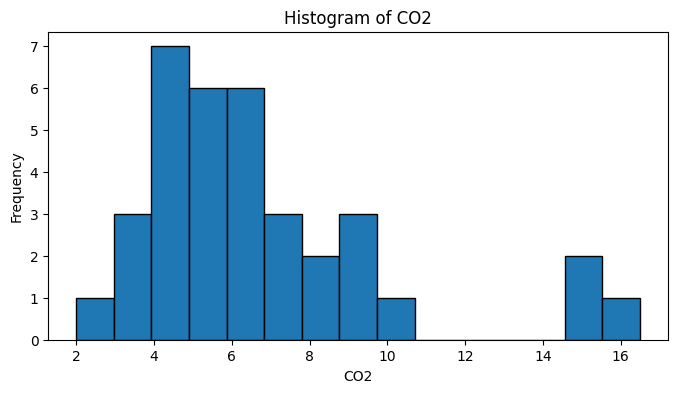

In [83]:
# carbon_west["CO2"]
# carbon_west["Nation"]
# carbon_west.shape ### == (35, 2)

plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"], bins=15, edgecolor='black')
plt.title(f'Histogram of CO2')
plt.xlabel("CO2")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [84]:
mean_value = np.mean(carbon_west["CO2"])
median_value = np.median(carbon_west["CO2"])
std_deviation = np.std(carbon_west["CO2"])

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [85]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
# murders #["state"], ["murder"]

Part a. Find the mean and standard deviation for murders without D.C.

In [86]:
minusDC = murders[murders["state"] != "DC"]

mean_value = np.mean(minusDC["murder"])
std_deviation = np.std(minusDC["murder"])

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [87]:
minimum = np.min(minusDC["murder"])
q1 = np.percentile(minusDC["murder"], 25)
median = np.median(minusDC["murder"])
q3 = np.percentile(minusDC["murder"], 75)
maximum = np.max(minusDC["murder"])

print(f"Minimum: {minimum}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
Q1: 2.625
Median: 4.85
Q3: 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [88]:
# minusDC.describe()
murders.describe()

### the mean is more affected by outliers.
### the range is more affected than the IQR

,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [89]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
# houses.head(10)


Part a. Construct a scatterplot between square feet and price of a home.

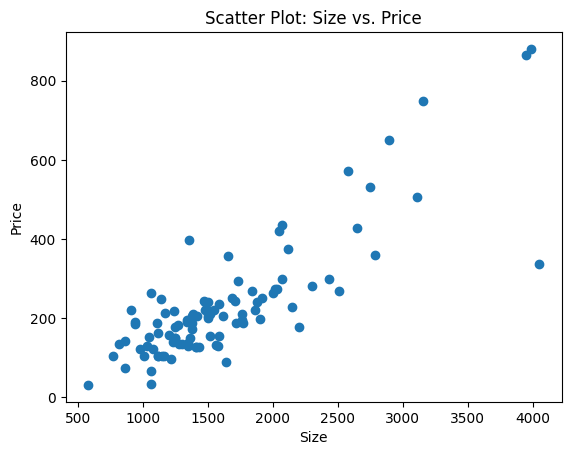

In [90]:
plt.scatter(houses["size"], houses["price"])
plt.title('Scatter Plot: Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


Part b. Find the correlation between the two variables.

In [91]:

correlation = houses["size"].corr(houses["price"])
print(f'Correlation between Size and Price: {correlation}')


Correlation between Size and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Slope (Coefficient): 0.18989116794379637
Intercept: -76.3893821074686


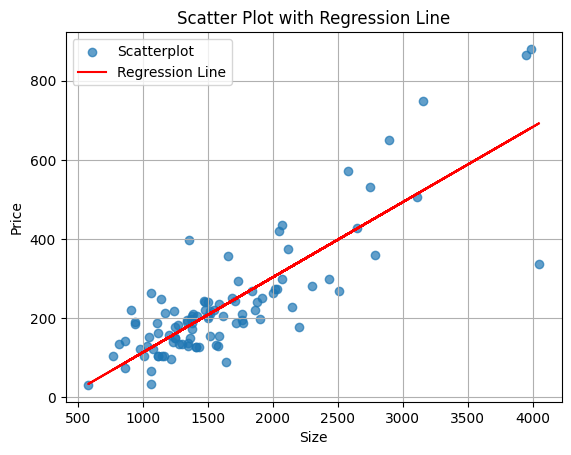

In [92]:
x = houses["size"].values.reshape(-1, 1)
y = houses["price"]

model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

plt.scatter(x, y, alpha=0.7, label='Scatterplot')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

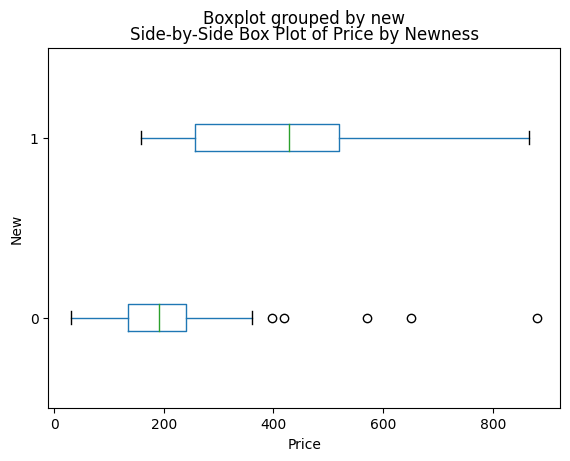

In [93]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False, grid = False)
plt.title('Side-by-Side Box Plot of Price by Newness')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

- The larger the house, the more pricy (generally). This is obvious by looking at the scatterplot, and it is confirmed by the positive coefficient on the regression line.

- Though there are some outliers marked on the old houses box plot, the range of the new houses is almost entirely above the mean of the old houses.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [94]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")


In [95]:
pd.crosstab(happy["marital"], happy["happiness"])
# note this data set is super weirdly formatted,
#   so I don't really understand what this is supposed to mean without a key,
#   but this is what we were told to do...

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
